# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

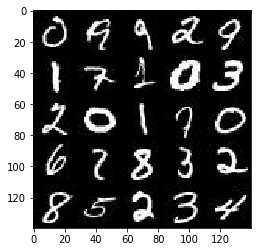

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

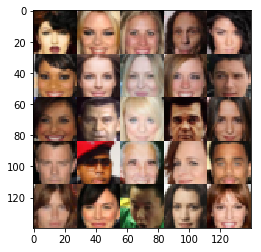

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input = tf.placeholder(tf.float32, shape=(None, image_width, image_height, image_channels), name = 'real_input')
    z = tf.placeholder(tf.float32,shape= (None, z_dim), name = 'z')
    learning_rate = tf.placeholder(tf.float32, shape=(), name = 'learning_rate')
    
    
    return real_input, z, learning_rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [7]:
alpha = 0.2

In [8]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    alpha = 0.1
    
    with tf.variable_scope('discriminator', reuse=reuse):

        x1 = tf.layers.conv2d(images, 128, 5, strides=2, kernel_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2, kernel_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        x3 = tf.layers.conv2d(relu2, 512, 5, strides=2, kernel_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        
        flat = tf.reshape(relu3, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [9]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    kinit = tf.random_normal_initializer(stddev=0.02)
    
    with tf.variable_scope('generator', reuse=(not is_train)):
        
        x1 = tf.layers.dense(z, 7*7*512)
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #x1 = tf.nn.dropout(x1, 0.5)
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, kernel_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #x2 = tf.nn.dropout(x2, 0.5)
        
        x3 = tf.layers.conv2d_transpose(x2, 126, 5, strides=2, kernel_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        #x3 = tf.nn.dropout(x3, 0.5)
        
         
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, kernel_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
        
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    smooth = 0.1
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [11]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    print_every=10 
    show_every=100


    steps = 0

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for e in range(epochs):
            for x in get_batches(batch_size):
                steps += 1
                x *= 2
    
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: x, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: x, lr: learning_rate})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: x})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(e+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.4944... Generator Loss: 0.2098
Epoch 1/2... Discriminator Loss: 2.8879... Generator Loss: 0.1799
Epoch 1/2... Discriminator Loss: 1.3165... Generator Loss: 1.1590
Epoch 1/2... Discriminator Loss: 2.4023... Generator Loss: 0.2223
Epoch 1/2... Discriminator Loss: 1.2939... Generator Loss: 1.2437
Epoch 1/2... Discriminator Loss: 1.6292... Generator Loss: 0.3972
Epoch 1/2... Discriminator Loss: 1.0045... Generator Loss: 1.2812
Epoch 1/2... Discriminator Loss: 1.4936... Generator Loss: 0.4647
Epoch 1/2... Discriminator Loss: 0.9915... Generator Loss: 1.3358
Epoch 1/2... Discriminator Loss: 1.4464... Generator Loss: 0.4738


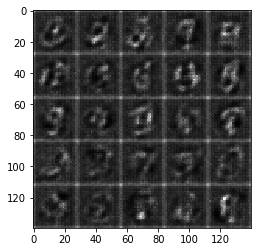

Epoch 1/2... Discriminator Loss: 1.1247... Generator Loss: 1.9605
Epoch 1/2... Discriminator Loss: 1.6243... Generator Loss: 2.6010
Epoch 1/2... Discriminator Loss: 0.9428... Generator Loss: 1.2757
Epoch 1/2... Discriminator Loss: 1.1952... Generator Loss: 0.7101
Epoch 1/2... Discriminator Loss: 1.2398... Generator Loss: 0.6134
Epoch 1/2... Discriminator Loss: 1.1009... Generator Loss: 0.7963
Epoch 1/2... Discriminator Loss: 0.8613... Generator Loss: 1.1446
Epoch 1/2... Discriminator Loss: 0.7710... Generator Loss: 1.3670
Epoch 1/2... Discriminator Loss: 1.0945... Generator Loss: 2.9338
Epoch 1/2... Discriminator Loss: 0.9151... Generator Loss: 0.9937


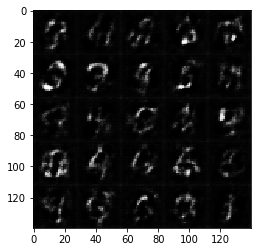

Epoch 1/2... Discriminator Loss: 1.3074... Generator Loss: 3.6305
Epoch 1/2... Discriminator Loss: 0.7572... Generator Loss: 1.3049
Epoch 1/2... Discriminator Loss: 0.6633... Generator Loss: 1.8407
Epoch 1/2... Discriminator Loss: 0.7480... Generator Loss: 2.0178
Epoch 1/2... Discriminator Loss: 0.7040... Generator Loss: 1.5341
Epoch 1/2... Discriminator Loss: 0.7122... Generator Loss: 1.6692
Epoch 1/2... Discriminator Loss: 0.7080... Generator Loss: 2.2961
Epoch 1/2... Discriminator Loss: 0.7272... Generator Loss: 1.5356
Epoch 1/2... Discriminator Loss: 0.8411... Generator Loss: 1.1288
Epoch 1/2... Discriminator Loss: 0.9464... Generator Loss: 1.0109


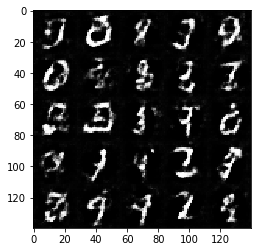

Epoch 1/2... Discriminator Loss: 0.6163... Generator Loss: 1.9002
Epoch 1/2... Discriminator Loss: 0.8933... Generator Loss: 2.4205
Epoch 1/2... Discriminator Loss: 0.9468... Generator Loss: 1.0404
Epoch 1/2... Discriminator Loss: 0.8656... Generator Loss: 1.2836
Epoch 1/2... Discriminator Loss: 1.4243... Generator Loss: 0.6448
Epoch 1/2... Discriminator Loss: 0.9891... Generator Loss: 2.0111
Epoch 1/2... Discriminator Loss: 1.4127... Generator Loss: 0.6030
Epoch 1/2... Discriminator Loss: 0.9071... Generator Loss: 1.9320
Epoch 1/2... Discriminator Loss: 1.3676... Generator Loss: 0.5490
Epoch 1/2... Discriminator Loss: 0.8694... Generator Loss: 1.2898


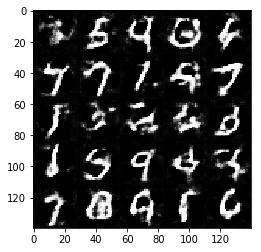

Epoch 1/2... Discriminator Loss: 1.1329... Generator Loss: 0.6923
Epoch 1/2... Discriminator Loss: 1.1993... Generator Loss: 0.6540
Epoch 1/2... Discriminator Loss: 1.2844... Generator Loss: 2.7889
Epoch 1/2... Discriminator Loss: 1.4030... Generator Loss: 0.5566
Epoch 1/2... Discriminator Loss: 0.8739... Generator Loss: 1.1731
Epoch 1/2... Discriminator Loss: 1.0959... Generator Loss: 1.8820
Epoch 1/2... Discriminator Loss: 1.2573... Generator Loss: 2.9176
Epoch 1/2... Discriminator Loss: 0.8067... Generator Loss: 1.8152
Epoch 1/2... Discriminator Loss: 1.0061... Generator Loss: 0.9679
Epoch 1/2... Discriminator Loss: 1.5519... Generator Loss: 0.4560


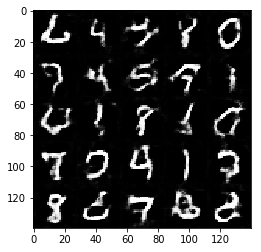

Epoch 1/2... Discriminator Loss: 1.0346... Generator Loss: 0.8262
Epoch 1/2... Discriminator Loss: 0.9951... Generator Loss: 2.2785
Epoch 1/2... Discriminator Loss: 0.9035... Generator Loss: 1.2071
Epoch 1/2... Discriminator Loss: 0.9193... Generator Loss: 1.1182
Epoch 1/2... Discriminator Loss: 1.0447... Generator Loss: 2.1299
Epoch 1/2... Discriminator Loss: 1.2230... Generator Loss: 0.6619
Epoch 1/2... Discriminator Loss: 1.2513... Generator Loss: 2.6578
Epoch 1/2... Discriminator Loss: 0.8741... Generator Loss: 1.2876
Epoch 1/2... Discriminator Loss: 0.9831... Generator Loss: 1.0296
Epoch 1/2... Discriminator Loss: 1.4009... Generator Loss: 0.5511


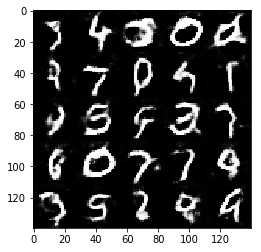

Epoch 1/2... Discriminator Loss: 1.4587... Generator Loss: 0.4871
Epoch 1/2... Discriminator Loss: 1.1431... Generator Loss: 0.7501
Epoch 1/2... Discriminator Loss: 1.0036... Generator Loss: 2.0181
Epoch 1/2... Discriminator Loss: 0.7295... Generator Loss: 1.8344
Epoch 1/2... Discriminator Loss: 1.1401... Generator Loss: 0.7510
Epoch 1/2... Discriminator Loss: 0.8416... Generator Loss: 1.8057
Epoch 1/2... Discriminator Loss: 0.8404... Generator Loss: 1.3759
Epoch 1/2... Discriminator Loss: 1.0243... Generator Loss: 0.8618
Epoch 1/2... Discriminator Loss: 1.0001... Generator Loss: 0.9578
Epoch 1/2... Discriminator Loss: 0.8756... Generator Loss: 1.0376


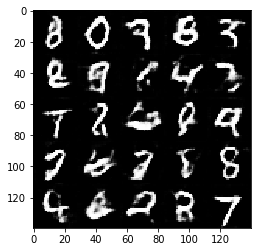

Epoch 1/2... Discriminator Loss: 0.7514... Generator Loss: 1.7656
Epoch 1/2... Discriminator Loss: 1.1759... Generator Loss: 0.7165
Epoch 1/2... Discriminator Loss: 1.0000... Generator Loss: 0.8800
Epoch 1/2... Discriminator Loss: 0.8258... Generator Loss: 1.5437
Epoch 1/2... Discriminator Loss: 0.8573... Generator Loss: 1.1750
Epoch 1/2... Discriminator Loss: 0.9361... Generator Loss: 1.0335
Epoch 1/2... Discriminator Loss: 0.8999... Generator Loss: 2.2343
Epoch 1/2... Discriminator Loss: 5.4250... Generator Loss: 6.1521
Epoch 1/2... Discriminator Loss: 0.7404... Generator Loss: 1.5514
Epoch 1/2... Discriminator Loss: 0.8862... Generator Loss: 1.0708


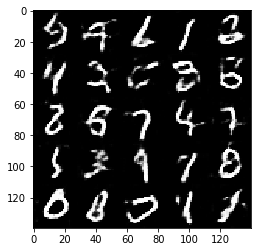

Epoch 1/2... Discriminator Loss: 0.8492... Generator Loss: 1.1951
Epoch 1/2... Discriminator Loss: 0.8323... Generator Loss: 1.5107
Epoch 1/2... Discriminator Loss: 0.7234... Generator Loss: 1.4837
Epoch 1/2... Discriminator Loss: 0.8431... Generator Loss: 1.1368
Epoch 1/2... Discriminator Loss: 0.9445... Generator Loss: 1.0118
Epoch 1/2... Discriminator Loss: 1.3582... Generator Loss: 0.6336
Epoch 1/2... Discriminator Loss: 1.1007... Generator Loss: 0.7862
Epoch 1/2... Discriminator Loss: 0.8372... Generator Loss: 1.2862
Epoch 1/2... Discriminator Loss: 0.9047... Generator Loss: 1.0130
Epoch 1/2... Discriminator Loss: 0.7917... Generator Loss: 1.2477


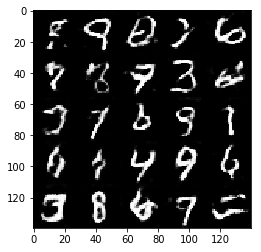

Epoch 1/2... Discriminator Loss: 1.2012... Generator Loss: 0.6355
Epoch 1/2... Discriminator Loss: 0.8682... Generator Loss: 1.2409
Epoch 1/2... Discriminator Loss: 0.9205... Generator Loss: 1.2503
Epoch 2/2... Discriminator Loss: 0.7382... Generator Loss: 1.6322
Epoch 2/2... Discriminator Loss: 1.0345... Generator Loss: 1.3740
Epoch 2/2... Discriminator Loss: 1.3221... Generator Loss: 0.6585
Epoch 2/2... Discriminator Loss: 0.7308... Generator Loss: 1.4774
Epoch 2/2... Discriminator Loss: 0.8608... Generator Loss: 1.0581
Epoch 2/2... Discriminator Loss: 0.8202... Generator Loss: 1.2387
Epoch 2/2... Discriminator Loss: 1.0018... Generator Loss: 0.8694


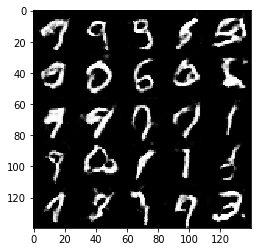

Epoch 2/2... Discriminator Loss: 0.8857... Generator Loss: 1.0809
Epoch 2/2... Discriminator Loss: 0.7575... Generator Loss: 1.3432
Epoch 2/2... Discriminator Loss: 0.7519... Generator Loss: 1.5145
Epoch 2/2... Discriminator Loss: 0.7205... Generator Loss: 2.0019
Epoch 2/2... Discriminator Loss: 0.7794... Generator Loss: 1.3521
Epoch 2/2... Discriminator Loss: 0.7648... Generator Loss: 2.0050
Epoch 2/2... Discriminator Loss: 1.0172... Generator Loss: 0.9026
Epoch 2/2... Discriminator Loss: 0.8428... Generator Loss: 1.1823
Epoch 2/2... Discriminator Loss: 1.5149... Generator Loss: 3.5770
Epoch 2/2... Discriminator Loss: 0.8903... Generator Loss: 1.1726


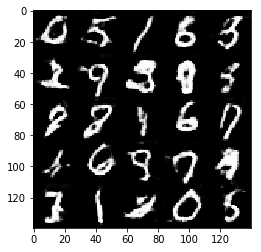

Epoch 2/2... Discriminator Loss: 0.7993... Generator Loss: 1.5123
Epoch 2/2... Discriminator Loss: 0.7226... Generator Loss: 1.6682
Epoch 2/2... Discriminator Loss: 0.7494... Generator Loss: 1.4135
Epoch 2/2... Discriminator Loss: 1.1802... Generator Loss: 0.6644
Epoch 2/2... Discriminator Loss: 0.8303... Generator Loss: 1.1569
Epoch 2/2... Discriminator Loss: 1.0510... Generator Loss: 0.8929
Epoch 2/2... Discriminator Loss: 0.8537... Generator Loss: 2.4777
Epoch 2/2... Discriminator Loss: 1.0799... Generator Loss: 0.7604
Epoch 2/2... Discriminator Loss: 1.1523... Generator Loss: 0.7294
Epoch 2/2... Discriminator Loss: 0.7802... Generator Loss: 1.5215


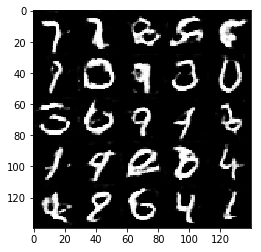

Epoch 2/2... Discriminator Loss: 0.8229... Generator Loss: 1.3665
Epoch 2/2... Discriminator Loss: 0.9012... Generator Loss: 1.2396
Epoch 2/2... Discriminator Loss: 1.0294... Generator Loss: 0.8640
Epoch 2/2... Discriminator Loss: 1.0041... Generator Loss: 0.9419
Epoch 2/2... Discriminator Loss: 1.0542... Generator Loss: 0.8233
Epoch 2/2... Discriminator Loss: 1.0398... Generator Loss: 0.8964
Epoch 2/2... Discriminator Loss: 1.0574... Generator Loss: 2.4139
Epoch 2/2... Discriminator Loss: 0.8329... Generator Loss: 1.2384
Epoch 2/2... Discriminator Loss: 0.7914... Generator Loss: 2.1085
Epoch 2/2... Discriminator Loss: 0.7227... Generator Loss: 1.8768


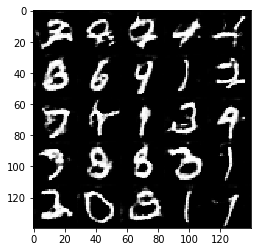

Epoch 2/2... Discriminator Loss: 1.1425... Generator Loss: 0.7357
Epoch 2/2... Discriminator Loss: 0.8122... Generator Loss: 1.7023
Epoch 2/2... Discriminator Loss: 0.8139... Generator Loss: 1.3649
Epoch 2/2... Discriminator Loss: 0.8382... Generator Loss: 1.0678
Epoch 2/2... Discriminator Loss: 0.9543... Generator Loss: 2.3318
Epoch 2/2... Discriminator Loss: 0.8843... Generator Loss: 1.8176
Epoch 2/2... Discriminator Loss: 0.8844... Generator Loss: 1.2301
Epoch 2/2... Discriminator Loss: 0.8124... Generator Loss: 1.2200
Epoch 2/2... Discriminator Loss: 0.8640... Generator Loss: 1.2623
Epoch 2/2... Discriminator Loss: 0.6808... Generator Loss: 1.8129


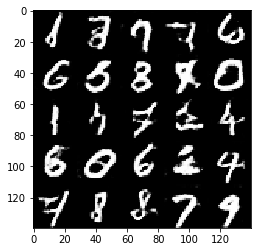

Epoch 2/2... Discriminator Loss: 1.9063... Generator Loss: 0.3647
Epoch 2/2... Discriminator Loss: 0.8324... Generator Loss: 1.2738
Epoch 2/2... Discriminator Loss: 0.8548... Generator Loss: 1.0980
Epoch 2/2... Discriminator Loss: 1.1517... Generator Loss: 0.7109
Epoch 2/2... Discriminator Loss: 1.9600... Generator Loss: 0.3836
Epoch 2/2... Discriminator Loss: 0.8620... Generator Loss: 1.3109
Epoch 2/2... Discriminator Loss: 0.8021... Generator Loss: 1.3122
Epoch 2/2... Discriminator Loss: 0.8122... Generator Loss: 1.4838
Epoch 2/2... Discriminator Loss: 0.7035... Generator Loss: 2.2526
Epoch 2/2... Discriminator Loss: 0.8038... Generator Loss: 1.2035


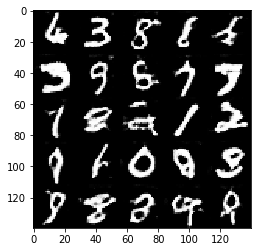

Epoch 2/2... Discriminator Loss: 1.3230... Generator Loss: 0.5979
Epoch 2/2... Discriminator Loss: 0.8312... Generator Loss: 1.2224
Epoch 2/2... Discriminator Loss: 0.7164... Generator Loss: 1.4267
Epoch 2/2... Discriminator Loss: 0.7984... Generator Loss: 1.2636
Epoch 2/2... Discriminator Loss: 1.2086... Generator Loss: 0.7070
Epoch 2/2... Discriminator Loss: 0.7393... Generator Loss: 1.4283
Epoch 2/2... Discriminator Loss: 0.8907... Generator Loss: 1.1505
Epoch 2/2... Discriminator Loss: 0.8308... Generator Loss: 1.1234
Epoch 2/2... Discriminator Loss: 0.8782... Generator Loss: 1.0789
Epoch 2/2... Discriminator Loss: 0.8891... Generator Loss: 1.0590


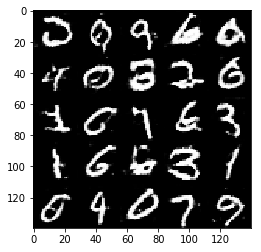

Epoch 2/2... Discriminator Loss: 0.7814... Generator Loss: 1.3589
Epoch 2/2... Discriminator Loss: 2.0433... Generator Loss: 0.3156
Epoch 2/2... Discriminator Loss: 0.7887... Generator Loss: 1.6035
Epoch 2/2... Discriminator Loss: 0.7086... Generator Loss: 1.8979
Epoch 2/2... Discriminator Loss: 0.9236... Generator Loss: 1.0338
Epoch 2/2... Discriminator Loss: 0.7568... Generator Loss: 1.3869
Epoch 2/2... Discriminator Loss: 0.7933... Generator Loss: 1.3642
Epoch 2/2... Discriminator Loss: 0.7128... Generator Loss: 1.7998
Epoch 2/2... Discriminator Loss: 0.6888... Generator Loss: 1.5686
Epoch 2/2... Discriminator Loss: 0.8730... Generator Loss: 1.0480


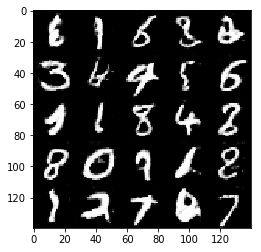

Epoch 2/2... Discriminator Loss: 0.7084... Generator Loss: 1.4467
Epoch 2/2... Discriminator Loss: 1.2089... Generator Loss: 0.7146
Epoch 2/2... Discriminator Loss: 1.0641... Generator Loss: 0.8802
Epoch 2/2... Discriminator Loss: 0.8838... Generator Loss: 2.0692
Epoch 2/2... Discriminator Loss: 0.6693... Generator Loss: 1.7422
Epoch 2/2... Discriminator Loss: 0.8955... Generator Loss: 1.0242
Epoch 2/2... Discriminator Loss: 0.6804... Generator Loss: 1.6578
Epoch 2/2... Discriminator Loss: 0.8143... Generator Loss: 1.1923
Epoch 2/2... Discriminator Loss: 0.7780... Generator Loss: 1.6743
Epoch 2/2... Discriminator Loss: 0.9777... Generator Loss: 0.9413


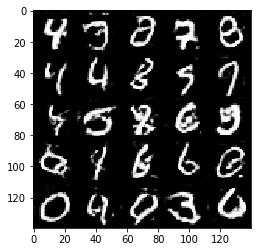

Epoch 2/2... Discriminator Loss: 0.8627... Generator Loss: 1.2714
Epoch 2/2... Discriminator Loss: 0.8924... Generator Loss: 0.9642
Epoch 2/2... Discriminator Loss: 1.1130... Generator Loss: 0.7447
Epoch 2/2... Discriminator Loss: 0.8173... Generator Loss: 1.2933
Epoch 2/2... Discriminator Loss: 0.6844... Generator Loss: 2.1347
Epoch 2/2... Discriminator Loss: 0.6256... Generator Loss: 1.8970
Epoch 2/2... Discriminator Loss: 0.7675... Generator Loss: 1.4433


In [14]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.9155... Generator Loss: 1.0270
Epoch 1/1... Discriminator Loss: 0.7458... Generator Loss: 1.3759
Epoch 1/1... Discriminator Loss: 0.9478... Generator Loss: 0.9279
Epoch 1/1... Discriminator Loss: 0.5211... Generator Loss: 3.5228
Epoch 1/1... Discriminator Loss: 0.6452... Generator Loss: 2.5824
Epoch 1/1... Discriminator Loss: 0.9749... Generator Loss: 1.0103
Epoch 1/1... Discriminator Loss: 0.8756... Generator Loss: 1.4670
Epoch 1/1... Discriminator Loss: 1.6408... Generator Loss: 3.7922
Epoch 1/1... Discriminator Loss: 1.0098... Generator Loss: 1.3417
Epoch 1/1... Discriminator Loss: 0.8559... Generator Loss: 1.1951


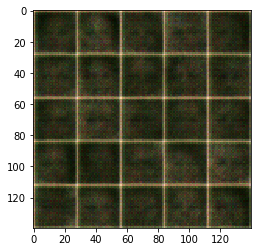

Epoch 1/1... Discriminator Loss: 1.5510... Generator Loss: 0.5002
Epoch 1/1... Discriminator Loss: 0.7350... Generator Loss: 1.6093
Epoch 1/1... Discriminator Loss: 2.1235... Generator Loss: 0.2416
Epoch 1/1... Discriminator Loss: 1.0441... Generator Loss: 2.6396
Epoch 1/1... Discriminator Loss: 1.0841... Generator Loss: 1.7300
Epoch 1/1... Discriminator Loss: 1.2710... Generator Loss: 0.9013
Epoch 1/1... Discriminator Loss: 1.3337... Generator Loss: 0.6042
Epoch 1/1... Discriminator Loss: 0.7795... Generator Loss: 1.5492
Epoch 1/1... Discriminator Loss: 1.0730... Generator Loss: 1.4159
Epoch 1/1... Discriminator Loss: 1.2708... Generator Loss: 0.8198


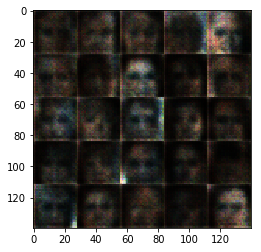

Epoch 1/1... Discriminator Loss: 1.1691... Generator Loss: 1.2363
Epoch 1/1... Discriminator Loss: 0.8590... Generator Loss: 1.6933
Epoch 1/1... Discriminator Loss: 0.9021... Generator Loss: 1.2603
Epoch 1/1... Discriminator Loss: 1.1353... Generator Loss: 0.8696
Epoch 1/1... Discriminator Loss: 0.9524... Generator Loss: 1.1507
Epoch 1/1... Discriminator Loss: 1.6909... Generator Loss: 0.3951
Epoch 1/1... Discriminator Loss: 0.8064... Generator Loss: 1.2457
Epoch 1/1... Discriminator Loss: 0.8233... Generator Loss: 1.2842
Epoch 1/1... Discriminator Loss: 0.6070... Generator Loss: 1.7118
Epoch 1/1... Discriminator Loss: 0.8988... Generator Loss: 1.1946


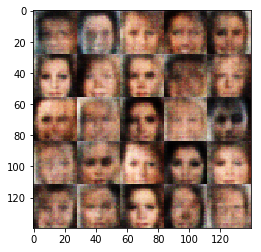

Epoch 1/1... Discriminator Loss: 1.0022... Generator Loss: 2.5005
Epoch 1/1... Discriminator Loss: 0.9697... Generator Loss: 2.0005
Epoch 1/1... Discriminator Loss: 1.3995... Generator Loss: 0.6835
Epoch 1/1... Discriminator Loss: 1.2186... Generator Loss: 0.7171
Epoch 1/1... Discriminator Loss: 0.7274... Generator Loss: 1.5300
Epoch 1/1... Discriminator Loss: 0.9353... Generator Loss: 1.0790
Epoch 1/1... Discriminator Loss: 0.8482... Generator Loss: 2.0245
Epoch 1/1... Discriminator Loss: 0.8228... Generator Loss: 1.7896
Epoch 1/1... Discriminator Loss: 0.9365... Generator Loss: 1.0082
Epoch 1/1... Discriminator Loss: 0.7642... Generator Loss: 1.5316


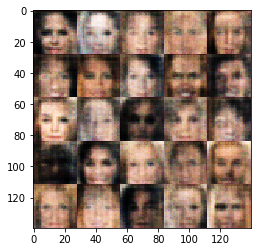

Epoch 1/1... Discriminator Loss: 1.2240... Generator Loss: 0.6690
Epoch 1/1... Discriminator Loss: 0.8261... Generator Loss: 1.3905
Epoch 1/1... Discriminator Loss: 0.9679... Generator Loss: 1.6444
Epoch 1/1... Discriminator Loss: 0.7806... Generator Loss: 1.7864
Epoch 1/1... Discriminator Loss: 2.1633... Generator Loss: 0.2343
Epoch 1/1... Discriminator Loss: 1.3374... Generator Loss: 0.7276
Epoch 1/1... Discriminator Loss: 1.2614... Generator Loss: 1.3590
Epoch 1/1... Discriminator Loss: 1.0772... Generator Loss: 1.2258
Epoch 1/1... Discriminator Loss: 1.3745... Generator Loss: 1.6052
Epoch 1/1... Discriminator Loss: 1.4165... Generator Loss: 0.6023


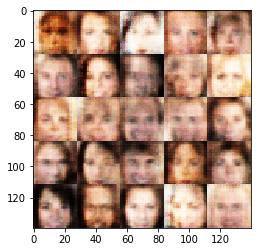

Epoch 1/1... Discriminator Loss: 1.2708... Generator Loss: 0.7262
Epoch 1/1... Discriminator Loss: 1.2700... Generator Loss: 0.7343
Epoch 1/1... Discriminator Loss: 1.2788... Generator Loss: 0.5822
Epoch 1/1... Discriminator Loss: 1.2618... Generator Loss: 0.6807
Epoch 1/1... Discriminator Loss: 1.0747... Generator Loss: 0.9117
Epoch 1/1... Discriminator Loss: 1.2419... Generator Loss: 0.9059
Epoch 1/1... Discriminator Loss: 1.3748... Generator Loss: 0.7145
Epoch 1/1... Discriminator Loss: 1.1411... Generator Loss: 0.8597
Epoch 1/1... Discriminator Loss: 1.1572... Generator Loss: 0.7470
Epoch 1/1... Discriminator Loss: 1.3587... Generator Loss: 0.6048


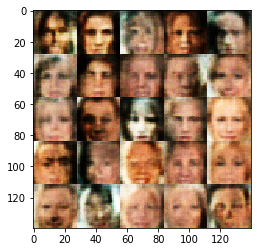

Epoch 1/1... Discriminator Loss: 1.0095... Generator Loss: 1.2862
Epoch 1/1... Discriminator Loss: 1.1298... Generator Loss: 0.8931
Epoch 1/1... Discriminator Loss: 1.3419... Generator Loss: 0.5949
Epoch 1/1... Discriminator Loss: 1.2182... Generator Loss: 1.1269
Epoch 1/1... Discriminator Loss: 1.1237... Generator Loss: 0.9399
Epoch 1/1... Discriminator Loss: 1.3041... Generator Loss: 1.3953
Epoch 1/1... Discriminator Loss: 1.0998... Generator Loss: 1.2119
Epoch 1/1... Discriminator Loss: 1.2381... Generator Loss: 0.7795
Epoch 1/1... Discriminator Loss: 1.0011... Generator Loss: 1.1757
Epoch 1/1... Discriminator Loss: 0.9742... Generator Loss: 1.1687


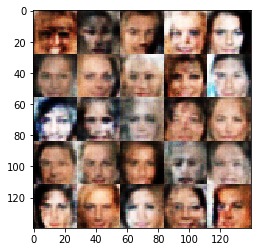

Epoch 1/1... Discriminator Loss: 1.1286... Generator Loss: 0.8537
Epoch 1/1... Discriminator Loss: 1.0188... Generator Loss: 1.1606
Epoch 1/1... Discriminator Loss: 1.0256... Generator Loss: 1.3119
Epoch 1/1... Discriminator Loss: 1.2142... Generator Loss: 0.6496
Epoch 1/1... Discriminator Loss: 0.9724... Generator Loss: 1.0966
Epoch 1/1... Discriminator Loss: 1.1058... Generator Loss: 1.6018
Epoch 1/1... Discriminator Loss: 1.1709... Generator Loss: 0.9551
Epoch 1/1... Discriminator Loss: 1.0190... Generator Loss: 0.9634
Epoch 1/1... Discriminator Loss: 0.9668... Generator Loss: 1.0029
Epoch 1/1... Discriminator Loss: 1.0190... Generator Loss: 1.1270


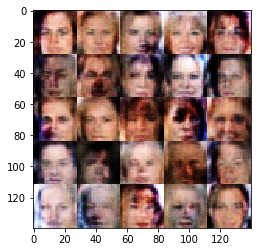

Epoch 1/1... Discriminator Loss: 1.2050... Generator Loss: 0.6713
Epoch 1/1... Discriminator Loss: 1.1211... Generator Loss: 1.0641
Epoch 1/1... Discriminator Loss: 1.2540... Generator Loss: 0.6584
Epoch 1/1... Discriminator Loss: 1.0794... Generator Loss: 0.9304
Epoch 1/1... Discriminator Loss: 1.2266... Generator Loss: 0.6810
Epoch 1/1... Discriminator Loss: 0.9893... Generator Loss: 1.1799
Epoch 1/1... Discriminator Loss: 1.1701... Generator Loss: 0.8255
Epoch 1/1... Discriminator Loss: 1.0427... Generator Loss: 1.0188
Epoch 1/1... Discriminator Loss: 0.8777... Generator Loss: 1.2897
Epoch 1/1... Discriminator Loss: 1.1731... Generator Loss: 0.7683


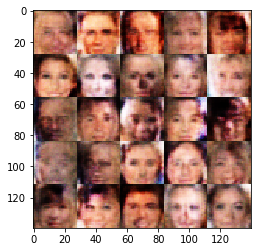

Epoch 1/1... Discriminator Loss: 1.1165... Generator Loss: 0.8171
Epoch 1/1... Discriminator Loss: 1.0437... Generator Loss: 0.9328
Epoch 1/1... Discriminator Loss: 1.0108... Generator Loss: 0.9695
Epoch 1/1... Discriminator Loss: 1.0865... Generator Loss: 0.9881
Epoch 1/1... Discriminator Loss: 1.2066... Generator Loss: 0.7688
Epoch 1/1... Discriminator Loss: 1.2548... Generator Loss: 0.7261
Epoch 1/1... Discriminator Loss: 1.1314... Generator Loss: 2.0576
Epoch 1/1... Discriminator Loss: 1.0506... Generator Loss: 1.1217
Epoch 1/1... Discriminator Loss: 1.1007... Generator Loss: 0.8340
Epoch 1/1... Discriminator Loss: 0.9868... Generator Loss: 1.5549


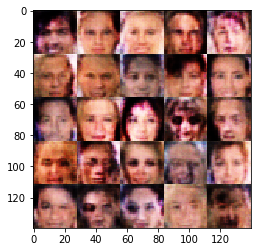

Epoch 1/1... Discriminator Loss: 1.0222... Generator Loss: 0.8437
Epoch 1/1... Discriminator Loss: 1.0766... Generator Loss: 0.9065
Epoch 1/1... Discriminator Loss: 1.1472... Generator Loss: 0.8215
Epoch 1/1... Discriminator Loss: 0.9652... Generator Loss: 1.1026
Epoch 1/1... Discriminator Loss: 1.1774... Generator Loss: 0.8178
Epoch 1/1... Discriminator Loss: 0.9670... Generator Loss: 1.0008
Epoch 1/1... Discriminator Loss: 1.3182... Generator Loss: 0.5563
Epoch 1/1... Discriminator Loss: 1.0016... Generator Loss: 1.4384
Epoch 1/1... Discriminator Loss: 0.9316... Generator Loss: 1.0249
Epoch 1/1... Discriminator Loss: 1.4134... Generator Loss: 0.5146


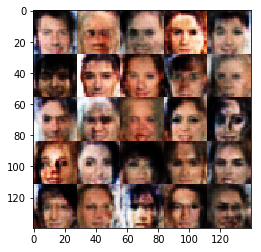

Epoch 1/1... Discriminator Loss: 0.8885... Generator Loss: 1.3902
Epoch 1/1... Discriminator Loss: 1.2343... Generator Loss: 0.6373
Epoch 1/1... Discriminator Loss: 0.8935... Generator Loss: 1.1335
Epoch 1/1... Discriminator Loss: 0.9442... Generator Loss: 1.2351
Epoch 1/1... Discriminator Loss: 0.9980... Generator Loss: 0.9453
Epoch 1/1... Discriminator Loss: 0.9042... Generator Loss: 1.6875
Epoch 1/1... Discriminator Loss: 0.9410... Generator Loss: 1.2946
Epoch 1/1... Discriminator Loss: 0.9009... Generator Loss: 1.0301
Epoch 1/1... Discriminator Loss: 0.7675... Generator Loss: 1.5665
Epoch 1/1... Discriminator Loss: 1.1757... Generator Loss: 0.7265


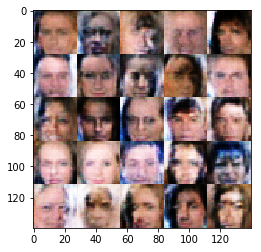

Epoch 1/1... Discriminator Loss: 1.0804... Generator Loss: 0.7854
Epoch 1/1... Discriminator Loss: 1.0399... Generator Loss: 1.1729
Epoch 1/1... Discriminator Loss: 1.2083... Generator Loss: 0.7956
Epoch 1/1... Discriminator Loss: 0.9414... Generator Loss: 1.8922
Epoch 1/1... Discriminator Loss: 0.9955... Generator Loss: 1.2034
Epoch 1/1... Discriminator Loss: 0.8556... Generator Loss: 1.3222
Epoch 1/1... Discriminator Loss: 0.7991... Generator Loss: 1.3203
Epoch 1/1... Discriminator Loss: 0.9531... Generator Loss: 1.1888
Epoch 1/1... Discriminator Loss: 0.9780... Generator Loss: 1.3936
Epoch 1/1... Discriminator Loss: 1.0691... Generator Loss: 0.9708


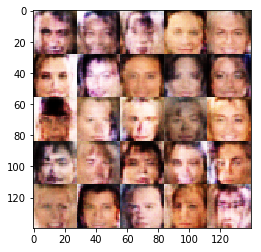

Epoch 1/1... Discriminator Loss: 1.0015... Generator Loss: 1.0310
Epoch 1/1... Discriminator Loss: 0.9495... Generator Loss: 1.0312
Epoch 1/1... Discriminator Loss: 1.1313... Generator Loss: 0.7102
Epoch 1/1... Discriminator Loss: 1.1951... Generator Loss: 0.6203
Epoch 1/1... Discriminator Loss: 1.2504... Generator Loss: 1.5180
Epoch 1/1... Discriminator Loss: 1.0315... Generator Loss: 0.9399
Epoch 1/1... Discriminator Loss: 0.8227... Generator Loss: 1.5731
Epoch 1/1... Discriminator Loss: 0.8557... Generator Loss: 1.5369
Epoch 1/1... Discriminator Loss: 1.2855... Generator Loss: 0.5837
Epoch 1/1... Discriminator Loss: 1.0553... Generator Loss: 0.7902


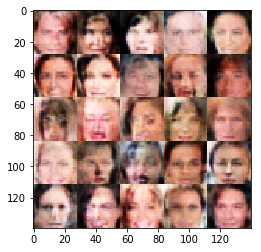

Epoch 1/1... Discriminator Loss: 1.1281... Generator Loss: 0.8214
Epoch 1/1... Discriminator Loss: 0.9758... Generator Loss: 1.0179
Epoch 1/1... Discriminator Loss: 1.3588... Generator Loss: 0.5187
Epoch 1/1... Discriminator Loss: 0.8951... Generator Loss: 1.2175
Epoch 1/1... Discriminator Loss: 0.5964... Generator Loss: 1.8223
Epoch 1/1... Discriminator Loss: 0.8728... Generator Loss: 1.0538
Epoch 1/1... Discriminator Loss: 0.8050... Generator Loss: 1.5401
Epoch 1/1... Discriminator Loss: 1.3329... Generator Loss: 0.5996
Epoch 1/1... Discriminator Loss: 1.0201... Generator Loss: 0.9046
Epoch 1/1... Discriminator Loss: 0.9308... Generator Loss: 1.0669


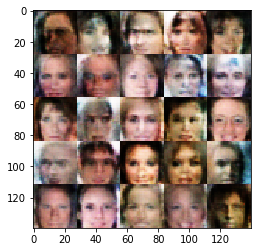

Epoch 1/1... Discriminator Loss: 1.2363... Generator Loss: 0.6731
Epoch 1/1... Discriminator Loss: 1.0403... Generator Loss: 0.8938
Epoch 1/1... Discriminator Loss: 1.3484... Generator Loss: 0.5860
Epoch 1/1... Discriminator Loss: 0.8536... Generator Loss: 1.1473
Epoch 1/1... Discriminator Loss: 0.8438... Generator Loss: 1.2867
Epoch 1/1... Discriminator Loss: 0.9248... Generator Loss: 1.0573
Epoch 1/1... Discriminator Loss: 1.0456... Generator Loss: 0.8230
Epoch 1/1... Discriminator Loss: 1.1315... Generator Loss: 0.7755
Epoch 1/1... Discriminator Loss: 0.8731... Generator Loss: 1.3001
Epoch 1/1... Discriminator Loss: 1.0197... Generator Loss: 1.1195


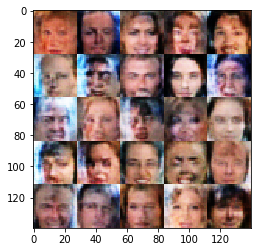

Epoch 1/1... Discriminator Loss: 1.2863... Generator Loss: 0.5959
Epoch 1/1... Discriminator Loss: 1.2645... Generator Loss: 0.6504
Epoch 1/1... Discriminator Loss: 1.0369... Generator Loss: 0.8792
Epoch 1/1... Discriminator Loss: 1.0186... Generator Loss: 0.9662
Epoch 1/1... Discriminator Loss: 1.0972... Generator Loss: 0.7268
Epoch 1/1... Discriminator Loss: 1.0456... Generator Loss: 1.1389
Epoch 1/1... Discriminator Loss: 0.7121... Generator Loss: 1.6371
Epoch 1/1... Discriminator Loss: 1.1506... Generator Loss: 0.7904
Epoch 1/1... Discriminator Loss: 1.1085... Generator Loss: 1.1376
Epoch 1/1... Discriminator Loss: 0.8111... Generator Loss: 1.5434


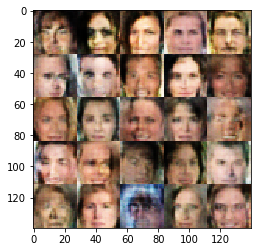

Epoch 1/1... Discriminator Loss: 1.2122... Generator Loss: 0.6826
Epoch 1/1... Discriminator Loss: 1.1473... Generator Loss: 0.7028
Epoch 1/1... Discriminator Loss: 0.8694... Generator Loss: 1.5936
Epoch 1/1... Discriminator Loss: 1.0302... Generator Loss: 0.9561
Epoch 1/1... Discriminator Loss: 0.9955... Generator Loss: 1.0211
Epoch 1/1... Discriminator Loss: 1.0360... Generator Loss: 1.8926
Epoch 1/1... Discriminator Loss: 1.0642... Generator Loss: 1.2711
Epoch 1/1... Discriminator Loss: 1.0890... Generator Loss: 1.4933
Epoch 1/1... Discriminator Loss: 0.9811... Generator Loss: 1.2656
Epoch 1/1... Discriminator Loss: 0.9510... Generator Loss: 1.2487


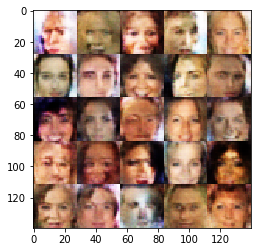

Epoch 1/1... Discriminator Loss: 0.9177... Generator Loss: 1.0866
Epoch 1/1... Discriminator Loss: 1.0326... Generator Loss: 0.9235
Epoch 1/1... Discriminator Loss: 0.9897... Generator Loss: 1.1971
Epoch 1/1... Discriminator Loss: 1.1141... Generator Loss: 0.8299
Epoch 1/1... Discriminator Loss: 1.0756... Generator Loss: 1.5028
Epoch 1/1... Discriminator Loss: 1.1689... Generator Loss: 0.6623
Epoch 1/1... Discriminator Loss: 1.1098... Generator Loss: 0.8810
Epoch 1/1... Discriminator Loss: 0.9566... Generator Loss: 1.3225
Epoch 1/1... Discriminator Loss: 1.0051... Generator Loss: 1.0465
Epoch 1/1... Discriminator Loss: 1.0205... Generator Loss: 0.8874


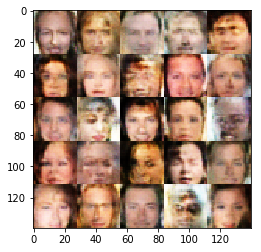

Epoch 1/1... Discriminator Loss: 1.2475... Generator Loss: 0.6033
Epoch 1/1... Discriminator Loss: 0.8196... Generator Loss: 1.4495
Epoch 1/1... Discriminator Loss: 0.8859... Generator Loss: 1.0361
Epoch 1/1... Discriminator Loss: 0.8679... Generator Loss: 1.2238
Epoch 1/1... Discriminator Loss: 1.0467... Generator Loss: 0.7884
Epoch 1/1... Discriminator Loss: 0.7881... Generator Loss: 1.2274
Epoch 1/1... Discriminator Loss: 1.0739... Generator Loss: 0.8501
Epoch 1/1... Discriminator Loss: 1.0308... Generator Loss: 0.9934
Epoch 1/1... Discriminator Loss: 0.8605... Generator Loss: 1.2886
Epoch 1/1... Discriminator Loss: 1.3959... Generator Loss: 0.5884


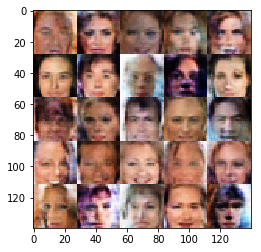

Epoch 1/1... Discriminator Loss: 0.9839... Generator Loss: 1.0533
Epoch 1/1... Discriminator Loss: 1.1032... Generator Loss: 0.8530
Epoch 1/1... Discriminator Loss: 0.7889... Generator Loss: 1.4674


KeyboardInterrupt: 

In [15]:
batch_size = 32
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.